In [1]:
import numpy as np # Imports Python numerical library
import seaborn as sns # Imports Library for drawing heatmaps
import matplotlib.pyplot as plt # Import Library for plotting graphs
from scipy.optimize import linprog # Imports Linear Programming function
from scipy.optimize import linprog_verbose_callback # Imports Linear Programming function
from IPython.display import IFrame # Imports HTML element loader
import time

In [2]:
import cobra
from time import sleep

In [3]:
model = cobra.io.read_sbml_model('./iAA1300_C.xml')
original_model = model.copy()

### Set the objective to maximize the reaction 'PHBS_syn'

In [53]:
model.objective = 'PHBS_syn'
startTime = time.time()
solution = model.optimize()
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))
print('Maximum objective = ',solution.objective_value)
print('Status = ',solution.status)


Execution time in seconds: 0.0494840145111084
Maximum objective =  17.82358913813454
Status =  optimal


In [5]:
model

Name,iAA1300
Memory address,14a02c88b550
Number of metabolites,1960
Number of reactions,2289
Number of genes,1300
Number of groups,0
Objective expression,1.0*BIOMASS_Av_DJ_core - 1.0*BIOMASS_Av_DJ_core_reverse_428bc
Compartments,"c, e, p"


In [60]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,15,6,100.00%
o2_e,EX_o2_e,9.794,0,0.00%
phbg_c,SK_phbg_c,17.82,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
PHB_c,DM_PHB_c,-17.82,4,79.22%
co2_e,EX_co2_e,-18.71,1,20.78%
h2o_e,EX_h2o_e,-36.53,0,0.00%


In [61]:
model.medium

{'EX_pi_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_fe3_e': 0.05,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 0.05,
 'EX_glc__D_e': 15.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_n2_e': 1000.0}

In [8]:
model.compartments

{'c': '', 'e': '', 'p': ''}

In [49]:
model.reactions.PHBS_syn

Reaction identifier,PHBS_syn
Name,PHB synthetasa
Memory address,0x14a01f3a77c0
Stoichiometry,3hbcoa__R_c + phbg_c --> PHB_c + coa_c (R)-3-Hydroxybutyryl-CoA + Growing PHB granule --> PHB granule + Coenzyme A
GPR,Avin_46290 or Avin_23630 or Avin_27080
Lower bound,0.0
Upper bound,1000.0


In [54]:
def plot_fba(fluxes, reactions = reacs):
  n = len(reactions)
  v_pos = np.arange(n)
  plt.bar(v_pos, fluxes, align='center')
  plt.xticks(v_pos, reactions)
  plt.ylabel('Flux Value')
  plt.title('Solution Vector')
  plt.show()

In [59]:
solution.fluxes

ALATA_D2     0.000000e+00
SHCHD2      -6.066864e-19
CPPPGO      -6.066864e-19
GTHOr       -4.677822e-14
GLYCTO2      0.000000e+00
                 ...     
QCCOR        1.958770e+01
VNIT         0.000000e+00
FENIT       -1.396931e-15
CYTCBB3pp    0.000000e+00
NADTRHD      0.000000e+00
Name: fluxes, Length: 2289, dtype: float64

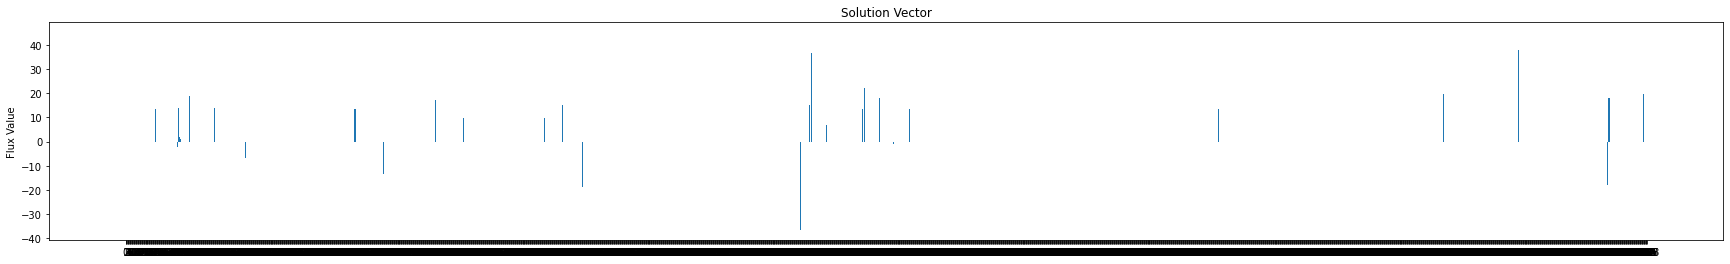

In [62]:
v_pos = np.arange(len(solution.fluxes))
f = plt.figure()
f.set_figwidth(30)
plt.bar(v_pos, solution.fluxes, align='center')
plt.xticks(v_pos)
#f.set_figheight(8)
plt.ylabel('Flux Value')
plt.title('Solution Vector')
plt.show()

### Growth on different substrates

In [22]:
original_model.medium

{'EX_pi_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_fe3_e': 0.05,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 0.05,
 'EX_glc__D_e': 15.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_n2_e': 1000.0}

In [23]:
# Default growth (glucose)
model = original_model.copy()
model.optimize().objective_value

0.9308245166661775

In [46]:
model.objective = 'PHBS_syn'

In [48]:
# PHBS?
model = original_model.copy()
model.optimize().objective_value

0.9308245166661775

In [25]:
# Fructose!
model = original_model.copy()
model.reactions.EX_glc__D_e.bounds = [0, 0]
model.reactions.EX_fru_e.bounds = [-15, -15]
model.optimize().objective_value

0.9661466052333049

In [26]:
# Sucrose!
model = original_model.copy()
model.reactions.EX_glc__D_e.bounds = [0, 0]
model.reactions.EX_sucr_e.bounds = [-15, -15]
model.optimize().objective_value

1.8944082892298726

In [27]:
model = original_model.copy()
model.reactions.EX_glc__D_e.bounds = [0, 0]
model.reactions.EX_sucr_e.bounds = [-15, -15]
solution = model.optimize()
solution.fluxes.index

Index(['ALATA_D2', 'SHCHD2', 'CPPPGO', 'GTHOr', 'GLYCTO2', 'GLYCTO3',
       'GLYCTO4', 'TRPS2', 'G3PD5', 'EX_chol_e',
       ...
       'EX_mal__D_e', 'FBA', 'GND', 'FIX', 'NADH6', 'QCCOR', 'VNIT', 'FENIT',
       'CYTCBB3pp', 'NADTRHD'],
      dtype='object', length=2289)

In [28]:
model.reactions.CS.metabolites

{<Metabolite accoa_c at 0x14a02259a850>: -1.0,
 <Metabolite h2o_c at 0x14a0224dab20>: -1.0,
 <Metabolite oaa_c at 0x14a0224f14c0>: -1.0,
 <Metabolite h_c at 0x14a022599d30>: 1.0,
 <Metabolite cit_c at 0x14a0224b5df0>: 1.0,
 <Metabolite coa_c at 0x14a022535970>: 1.0}

In [41]:
model.metabolites.query("phb")[1]

Metabolite identifier,phbg_c
Name,Growing PHB granule
Memory address,0x14a0204de940
Formula,R
Compartment,c
In 2 reaction(s),"SK_phbg_c, PHBS_syn"


In [42]:
model.reactions.query("PHBS_syn")[0]

Reaction identifier,PHBS_syn
Name,PHB synthetasa
Memory address,0x14a023c642e0
Stoichiometry,3hbcoa__R_c + phbg_c --> PHB_c + coa_c (R)-3-Hydroxybutyryl-CoA + Growing PHB granule --> PHB granule + Coenzyme A
GPR,Avin_46290 or Avin_23630 or Avin_27080
Lower bound,0.0
Upper bound,1000.0


In [30]:
model.reactions.query(lambda r: model.metabolites.sucr_p in r.metabolites)

[<Reaction SUCptspp at 0x14a02231adf0>, <Reaction SUCRtex at 0x14a02228e6d0>]

In [35]:
# Acetate
model = original_model.copy()
model.reactions.EX_glc__D_e.bounds = [0, 0]
model.reactions.EX_ac_e.bounds = [-15, -15]
model.optimize().objective_value

0.23509253246972547